In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("C:\\Users\\Shovon\\Desktop\\Online Retail\\OnlineRetail.csv",encoding =('ISO-8859-2'),low_memory =False)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [7]:
df['CustomerID'].nunique()

4372

In [8]:
df['InvoiceNo'].nunique()

25900

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df = df.dropna()

In [11]:
df.shape

(406829, 8)

In [12]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [13]:
df['Amount'] = df['UnitPrice'] * df['Quantity']

In [14]:
df = df.reset_index()

In [15]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [16]:
df_amount = df.groupby('CustomerID')['Amount'].sum()

In [17]:
df = df.reset_index()

In [18]:
df_amount.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [19]:
df_frequency = df.groupby('CustomerID')['InvoiceNo'].count()

In [20]:
df_frequency.head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [21]:
df_f = pd.merge(df_amount,df_frequency ,how = 'inner', on='CustomerID')

In [22]:
df_f.head()

,Amount,InvoiceNo
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17


In [23]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [24]:
df_max = df['InvoiceDate'].max()
df_max

Timestamp('2011-12-09 12:50:00')

In [25]:
df['diff'] = df_max - df['InvoiceDate']

In [26]:
df.head()

,level_0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [27]:
df_diff= df.groupby('CustomerID')['diff'].min()

In [28]:
df_diff.reset_index()
df_diff.head()

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
Name: diff, dtype: timedelta64[ns]

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [30]:
df_final = pd.merge(df_f, df_diff , how = 'inner' , on = 'CustomerID')

In [31]:
df_final.head()

,Amount,InvoiceNo,diff
CustomerID,,,
12346.0,0.00,2,325 days 02:33:00
12347.0,4310.00,182,1 days 20:58:00
12348.0,1797.24,31,74 days 23:37:00
12349.0,1757.55,73,18 days 02:59:00
12350.0,334.40,17,309 days 20:49:00


In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Amount     4372 non-null   float64        
 1   InvoiceNo  4372 non-null   int64          
 2   diff       4372 non-null   timedelta64[ns]
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 136.6+ KB


In [33]:
df_final = df_final.rename({'InvoiceNo': 'Frequency', 'diff': 'Recency'}, axis=1)

In [34]:
df_final.head()

,Amount,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325 days 02:33:00
12347.0,4310.00,182,1 days 20:58:00
12348.0,1797.24,31,74 days 23:37:00
12349.0,1757.55,73,18 days 02:59:00
12350.0,334.40,17,309 days 20:49:00


In [35]:
df_final['Recency'] = df_final['Recency'].dt.days

In [36]:
df_final.head()

,Amount,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309


In [37]:
attributes = ['Amount' , 'Frequency' , 'Recency' ]

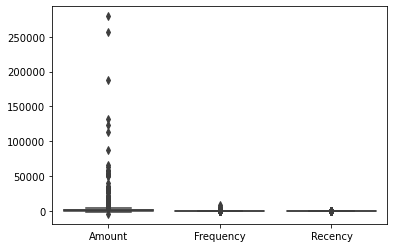

In [38]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.boxplot(data = df_final[attributes])

In [39]:
df_final.nunique().sum()

5143

In [40]:
df_final.shape

(4372, 3)

In [41]:
Q1 = df_final.Amount.quantile(0.05)
Q3 = df_final.Amount.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.Amount >= Q1 - 1.5 * IQR) & (df_final.Amount <= Q3 + 1.5 * IQR) ]

Q1 = df_final.Recency.quantile(0.05)
Q3 = df_final.Recency.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.Recency >= Q1 - 1.5 * IQR) & (df_final.Recency <= Q3 + 1.5 * IQR) ]

Q1 = df_final.Frequency.quantile(0.05)
Q3 = df_final.Frequency.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.Frequency >= Q1 - 1.5 * IQR) & (df_final.Frequency <= Q3 + 1.5 * IQR) ]

In [42]:
df_final.shape

(4293, 3)

In [43]:
df_final.head()

,Amount,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309


In [44]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
df1 = scaler.fit_transform(df_final)

In [45]:
df1.shape

(4293, 3)

In [46]:
import pandas as pd
df_f = pd.DataFrame(df1)
df_f.columns = ['Amount' , 'Frequency' , 'Recency']
df_f.head

<bound method NDFrame.head of         Amount  Frequency   Recency
0    -0.723738  -0.752888  2.301611
1     1.731617   1.042467 -0.906466
2     0.300128  -0.463636 -0.183658
3     0.277517  -0.044720 -0.738141
4    -0.533235  -0.603275  2.143188
...        ...        ...       ...
4288 -0.624669  -0.683068 -0.193560
4289 -0.620853  -0.673094  1.826341
4290 -0.677696  -0.703017  0.865898
4291 -0.623131  -0.643171 -0.847057
4292  0.322938  -0.074643 -0.500505

[4293 rows x 3 columns]>

In [47]:
df_f

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188
...,...,...,...
4288,-0.624669,-0.683068,-0.193560
4289,-0.620853,-0.673094,1.826341
4290,-0.677696,-0.703017,0.865898
4291,-0.623131,-0.643171,-0.847057


In [48]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_f)

KMeans(n_clusters=2)

In [49]:
# inertia on the fitted data
kmeans.inertia_

7661.7058693207655

C:\Users\Shovon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Shovon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Shovon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Shovon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Shovon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: Futu

Text(0, 0.5, 'Inertia')

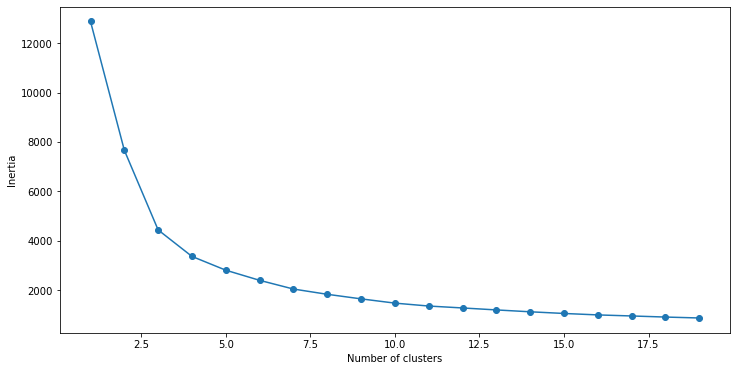

In [50]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df_f)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [51]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(df_f)
pred = kmeans.predict(df_f)

C:\Users\Shovon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [52]:
frame = pd.DataFrame(df_f)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    2250
2    1035
3     782
0     226
Name: cluster, dtype: int64

In [53]:
import matplotlib.pyplot as plt

In [54]:
pred

array([2, 3, 1, ..., 2, 1, 1])

In [55]:
df_final['Label'] = pred

C:\Users\Shovon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount', ylabel='Recency'>

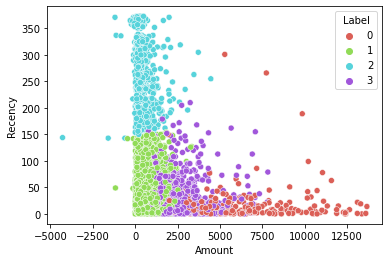

In [56]:
sns.scatterplot(df_final['Amount'] ,df_final['Recency'] , hue = df_final['Label'] , palette = sns.color_palette('hls',4))

C:\Users\Shovon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount', ylabel='Frequency'>

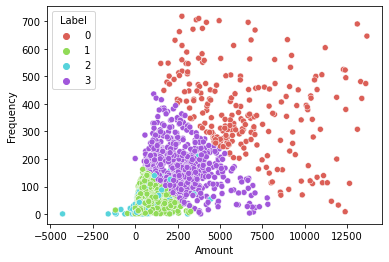

In [57]:
sns.scatterplot(df_final['Amount'] ,df_final['Frequency'] , hue = df_final['Label'] , palette = sns.color_palette('hls',4))

C:\Users\Shovon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='Recency'>

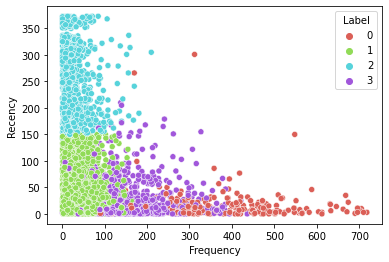

In [58]:
sns.scatterplot(df_final['Frequency'] ,df_final['Recency'] , hue = df_final['Label'] , palette = sns.color_palette('hls',4))

C:\Users\Shovon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount', ylabel='Frequency'>

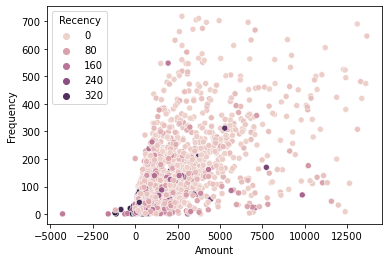

In [59]:
sns.scatterplot(df_final['Amount'] ,df_final['Frequency'] ,df_final['Recency'] , hue = df_final['Label'])